In [1]:
import pandas as pd
import os
from scipy.stats import kstest,ttest_ind

# libraries related to plotting
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import matplotlib
import matplotlib.patches as mpatches
matplotlib.rcParams['font.sans-serif'] = "Arial" # missing fonts:: https://alexanderlabwhoi.github.io/post/2021-03-missingfont/
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams.update({'font.size': 14, 'axes.linewidth': 2, 'xtick.major.width': 1.5, 'xtick.major.size': 7, 'ytick.major.width': 1.5, 'ytick.major.size': 7})
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
def save_pdf(save_file, fig):
    pdf = PdfPages(save_file)
    pdf.savefig(fig, bbox_inches='tight')
    pdf.close()
    return

In [3]:
combo4_file = "../data/additive/combo4.csv"
combo3_file = "../data/additive/combo3.csv"
df2 = pd.read_csv(combo4_file, usecols=["Expected_value", "Observed_value"])
df3 = pd.read_csv(combo3_file, usecols=["Expected_value", "Observed_value"])

df = pd.concat((df2, df3))

plot_df = df.melt(value_vars=["Observed_value", "Expected_value"])

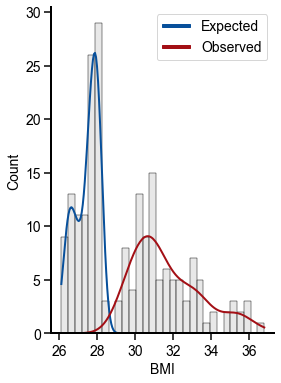

In [4]:
fig,ax = plt.subplots(1,1,figsize=(4,6))

g = sns.histplot(
    data=plot_df, x='value', 
    hue='variable', hue_order=["Observed_value", "Expected_value"],
    edgecolor="k",
    linewidth=0.45,
    palette=[ "lightgrey", "lightgrey"], kde=True,
    element="bars", fill=True, bins=30, line_kws={"linewidth":2, "linestyle":"solid"}, legend=False,
    ax=ax)
g.axes.lines[1].set_color("#a30f15")
g.axes.lines[0].set_color("#08509b")

# kde = sns.kdeplot(
#     data=plot_df, x='value', hue='variable', 
#     hue_order=["Observed_value", "Expected_value"], 
#     palette=["#c1272d", "royalblue"], linewidth=5, fill=False, common_norm=False)

ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(2))
g.set_xlabel("BMI")
# g.set_title('Expected vs Observed for Obesity Risk Combinations');
# g.set_ylim(-0.05, 1.05)
ax.spines[['right', 'top']].set_visible(False)

# legend
red_patch = mpatches.Patch(color='#a30f15', label='Observed')
blue_patch = mpatches.Patch(color='#08509b', label='Expected')
ax.legend(handles=[blue_patch, red_patch], handlelength=2, handleheight=0.001)

In [5]:
save_file = "/data5/deepro/ukbiobank/papers/bmi_project/4_characterization/lifestyle_white_british/data/additive/expected_observed.pdf"
save_pdf(save_file, fig)

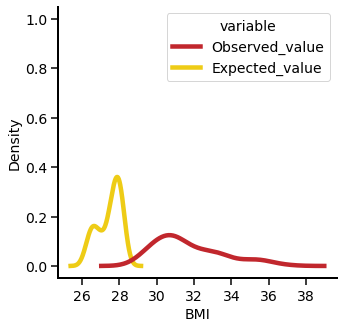

In [3]:
fig = plt.figure(figsize=(5,5))
g = sns.kdeplot(
    data=plot_df, x='value', hue='variable', 
    hue_order=["Observed_value", "Expected_value"], 
    palette=["#c1272d", "#eecc16"], 
    fill=False, linewidth=4.5,)
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(2))
g.set_xlabel("BMI")
# g.set_title('Expected vs Observed for Obesity Risk Combinations');
g.set_ylim(-0.05, 1.05)
ax.spines[['right', 'top']].set_visible(False)
# pdf = PdfPages('figures/obs_exp.pdf')
# pdf.savefig(fig, bbox_inches='tight')
# pdf.close()

In [6]:
ttest_ind(plot_df.loc[plot_df.variable=="Expected_value", "value"], plot_df.loc[plot_df.variable=="Observed_value", "value"], alternative="less"), kstest(plot_df.loc[plot_df.variable=="Expected_value", "value"], plot_df.loc[plot_df.variable=="Observed_value", "value"])

(Ttest_indResult(statistic=-22.37030332456877, pvalue=7.145328917963486e-57),
 KstestResult(statistic=1.0, pvalue=1.3941776745178837e-60))